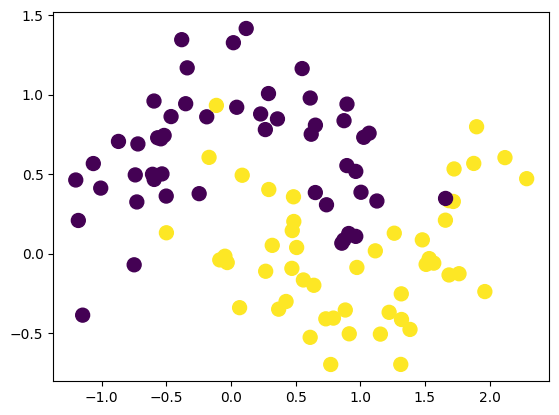

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
#                 샘플수                      랜덤
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
#산점도                       포인트스타일

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# criterion(entropy,gini)

model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='entropy')
                                            # 길이조절      혼잡도 =entropy, gini
model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


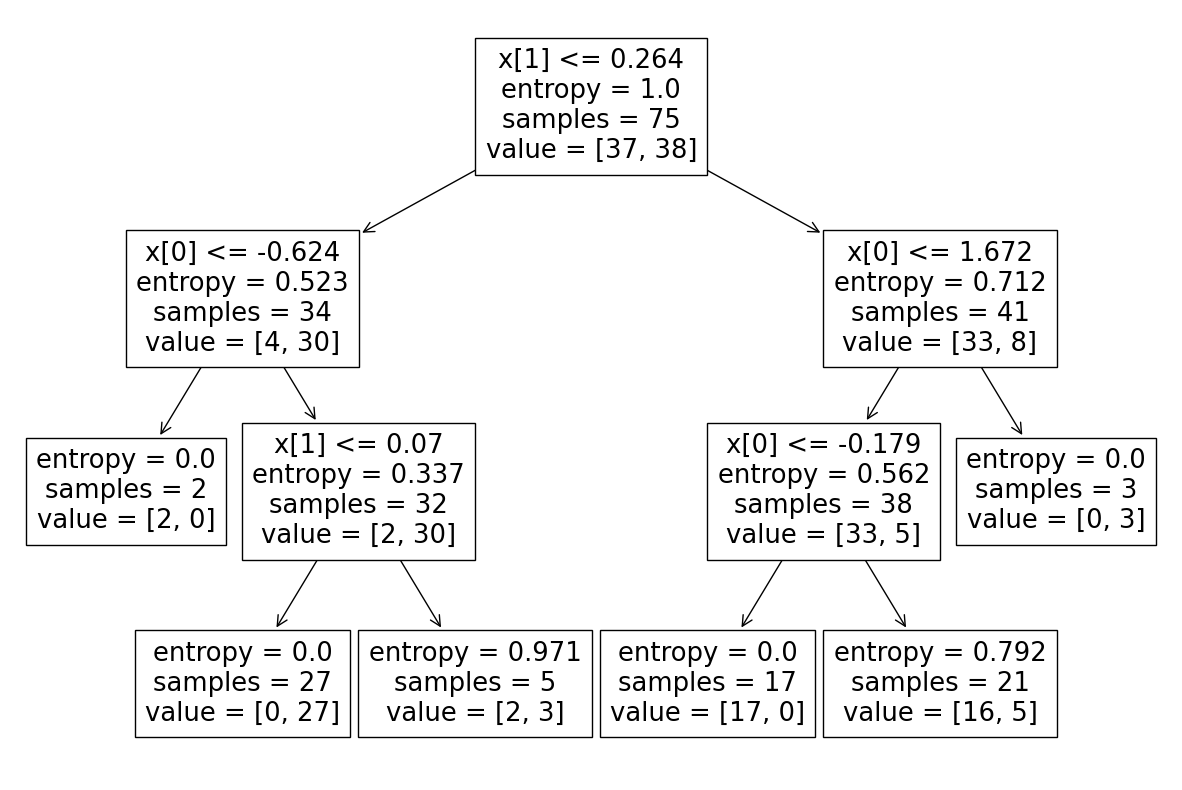

In [5]:
from sklearn import tree

plt.figure(figsize=(15,10))

tree.plot_tree(model)

plt.show()

In [ ]:
#동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 계속 나온다면 순도 최대

#엔트로피 : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(무질서,불확실성  최소, 순도 최대) => 엔트로피 0

#반반씩 섞여 있을 경우(불확실성 최대, 순도 최소) => 엔트로피 1

#gini index(지니 계수) : 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대),  0.5이면 불확실성 최대, 순도 최소

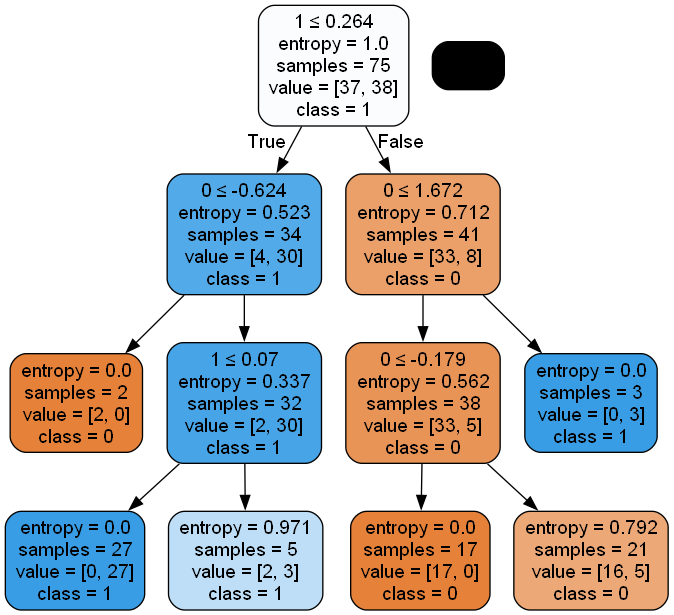

In [10]:
# graphviz exe 설치(path 추가 옵션 선택)

from sklearn.tree import export_graphviz

import pydotplus

import graphviz

from IPython.display import Image

import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

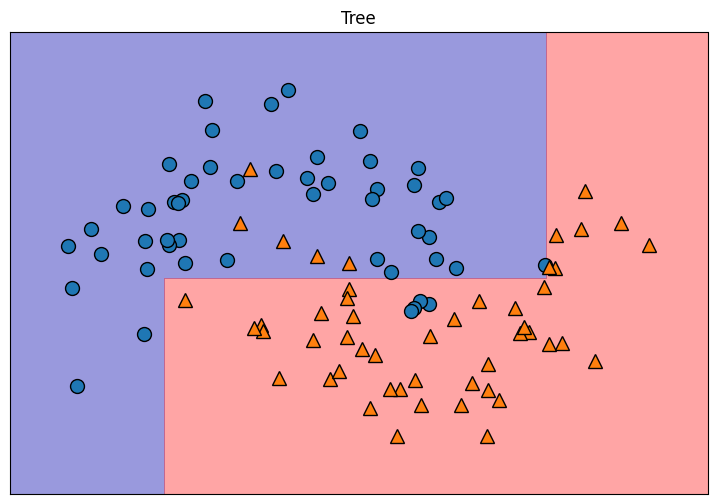

In [11]:
# 에러가 발생할 경우 

# pip install joblib==1.1.0

import matplotlib.pyplot as plt

import mglearn
plt.figure(figsize=(9,6))

plt.title("Tree")

#클래스 구분면

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [12]:
#트리모형의 엔트로피와 지니
#동전 던지기

from math import log2, ceil

# 확률 50%
p = 0.5

# 이벤트 정보 계산
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h)) #1bit로 표현 가능

확률: 0.5
정보량: 1.0 1


In [13]:
#확률이 10%라면?
p = 0.1

# 이벤트 정보 계산
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h)) #4bit가 필요함

확률: 0.1
정보량: 3.321928094887362 4


In [14]:
#주사위 던지기

from math import log2

p = 1/6

# 이벤트 정보 계산
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h)) #3bit가 필요함

확률: 0.16666666666666666
정보량: 2.584962500721156 3


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'Information')

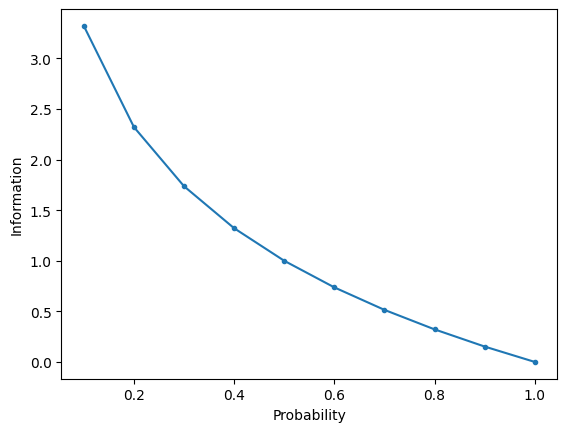

In [15]:
# 확률과 엔트로피

import numpy as np
from math import log2
from matplotlib import pyplot as plt

# 확률
probs = np.arange(0.1, 1.1, 0.1) # 0.1 ~ 1.0 (step 0.1)
print(probs)

# 정보량 계산
info = [-log2(p) for p in probs]
plt.plot(probs, info, marker='.')
plt.xlabel('Probability')
plt.ylabel('Information')

# 확률이 높을수록 정보량은 감소하고 확률이 낮을수록 정보량은 증가한다.

In [16]:
#랜덤 변수에 대한 정보를 계산하는 것을 '정보 엔트로피' 또는 '엔트로피'라고 함
#각 사건의 확률에 대한 로그에 각 사건의 확률을 곱한 값의 합계의  음수
#주사위 던지기의 엔트로피 계산

from math import log2

# 경우의 수
n = 6

# 확률
p = 1.0 /n

# 엔트로피 공식
entropy = -sum([p * log2(p) for _ in range(n)])

print(entropy) #비트
print(log2(2)) #2에 거듭제곱을 해서 2가 되는 수는 1
print(log2(4)) #2에 거듭제곱을 해서 4가 되는 수는 2
#print(log2(0)) #2에 거듭제곱을 해서 0이 되는 수는 없음

2.584962500721156
1.0
2.0


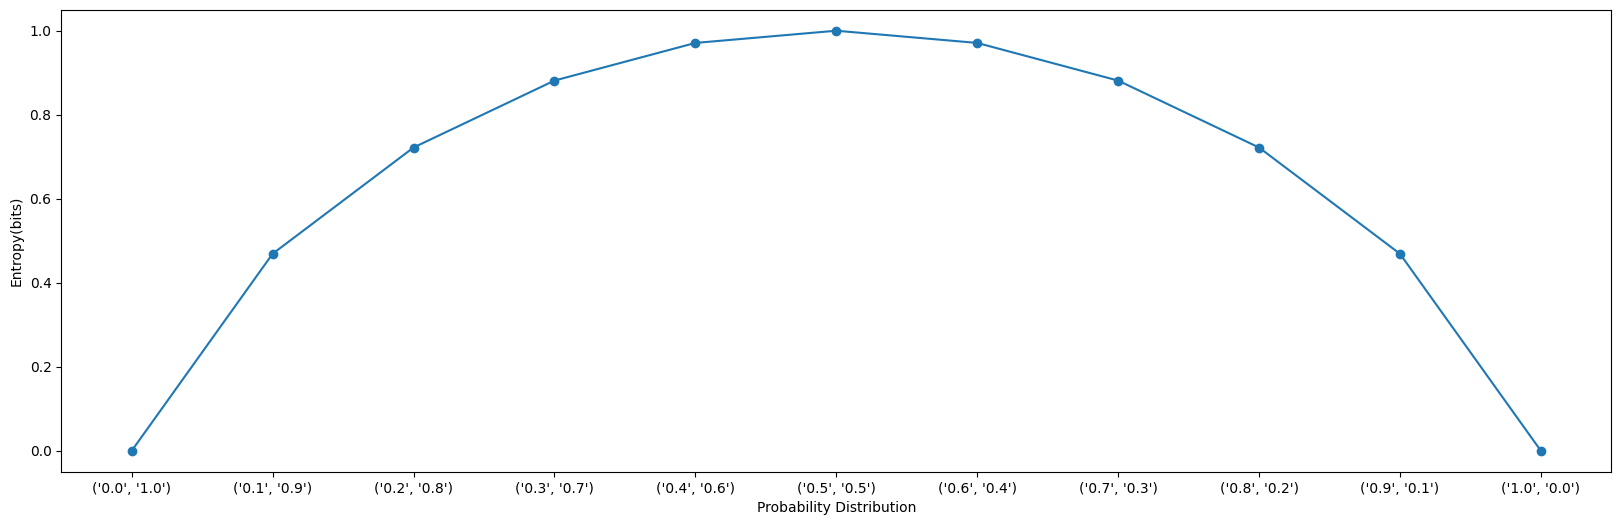

In [17]:
# 엔트로피는 0.0 ~ 1.0 사이의 값
# 1개 클래스만 구성되어 있으면(100% 순도) 0, 2개 클래스가 같은 비율(50:50)로 섞여 있으면 1.0

from math import log2
import matplotlib.pyplot as plt

def entropy(events):
    #1e-15 : 로그 계산에 오류가 발생하지 않도록 임의로 더해 주는 매우 작은 숫자값
    return -sum([p * log2(p + 1e-15) for p in events])

# 확률
probs = np.arange(0.0, 1.1, 0.1)

# 확률 분포
dists = [[p, 1 - p] for p in probs]

# 각 분포에 대한 엔트로피 계산
ents = [entropy(d) for d in dists]

# 학률분포와 엔트로피 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]

for d in dists:
    dd = (f'{d[0]:.1f}',f'{d[1]:.1f}')
    xnum.append(dd)

plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()

In [18]:
# 지니 계수 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표(0 ~ 0.5)
# 100% 순수한 노드로 구성되어 있으면 0
# 클래스별로 균등하게 분포되어 있으면(50:50) 0.5
# 로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 좀더 우수함

import numpy as np

a = np.array([1,3,6])
b = np.array([2,4,6])

#a의 각 원소에서 b의 각 원소를 뺀 행렬
diff = np.subtract.outer(a, b)

# 1-2 1-4 1-6
# 3-2 3-4 3-6
# 6-2 6-4 6-6

print(diff)

[[-1 -3 -5]
 [ 1 -1 -3]
 [ 4  2  0]]


In [19]:
def gini(x):
    # 평균 절대 오차
    mad = np.abs(np.subtract.outer(x, x)).mean()

    # 평균 절대 오차를 평균으로 나누고
    rmad = mad/np.mean(x)

    # 0.5를 곱하여 리턴
    g = 0.5 * rmad

    return g

v = [0,1,0,1] #2개 클래스가 균등하게 섞여 있으면 지니 계수는 0.5
print(gini(v))

v = [1,1,1,1] #1개 클래스만으로 100% 구성되어 있으면 지니 계수는 0
print(gini(v))

v = [1,0,1,1]
print(gini(v))

0.5
0.0
0.25


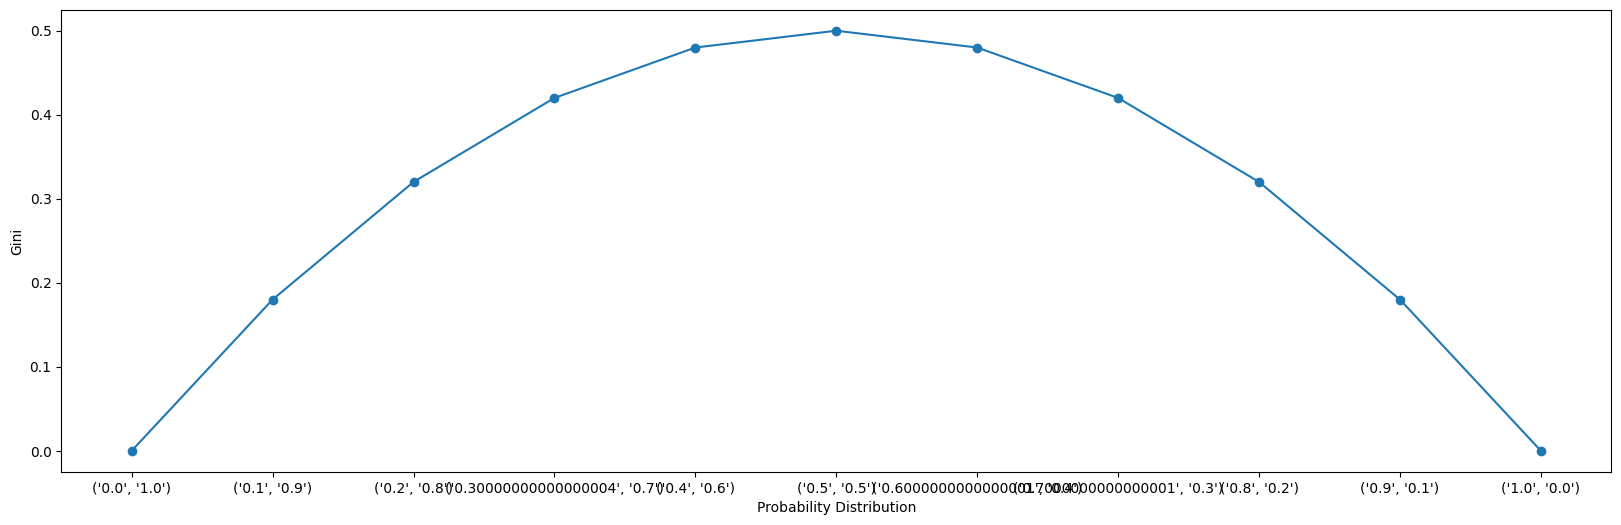

In [20]:
# 지니계수는 0.0 ~ 0.5 사이의 값
# 1개 클래스만 구성되어 있으면(100% 순도) 0, 2개 클래스가 같은 비율(50:50)로 섞여 있으면 0.5

%matplotlib inline

from math import log2
from matplotlib import pyplot

def gini2(events):
    return sum([p * (1 - p) for p in events])

# 확률
probs = np.arange(0.0, 1.1, 0.1)

# 확률 분포
dists = [[p, 1 - p] for p in probs]

# 각 분포에 대한 지니계수 계산
ents = [gini2(d) for d in dists]

# 확률분포와 지니계수 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')

xnum=[]

for d in dists:
    dd = (str(d[0]),'{:.1f}'.format(d[1]))
    xnum.append(dd)

plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Gini') #지니계수
plt.show()

In [1]:
# 트리 모형의 splitter
import pandas as pd

df=pd.read_csv('c:/data/rides/rides2.csv')

df

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1
...,...,...,...,...,...,...,...,...
495,0,0,11.052577,90,72,68,90,0
496,1,0,8.187740,91,83,82,91,0
497,0,2,45.177402,95,92,85,93,1
498,0,3,27.088380,83,83,80,88,1


In [2]:
df["overall"].value_counts()

overall
1    255
0    245
Name: count, dtype: int64

In [3]:
train_cols = df.columns[:-1]

X = df[train_cols]

y = df["overall"]

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['overall'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["overall"].value_counts()

overall
0    245
1    245
Name: count, dtype: int64

In [5]:
X = X_samp[train_cols] # 독립변수
y = y_samp["overall"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [ ]:
#splitter {best, random}, default=best

#각 노드에서 분할을 선택하는 데 사용된 전략

# best : 최선의 변수를 선택하는 방식(랜덤포레스트에서 사용하는 방식)

# random : 무작위로 변수를 선택하는 방식(엑스트라 트리에서 사용하는 방식)

In [7]:
from sklearn.tree import DecisionTreeClassifier

#트리 모형 생성(기본옵션)

model1 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=0)

model1.fit(X_train, y_train)

print("학습용:",model1.score(X_train, y_train))

print("검증용:",model1.score(X_test, y_test))

학습용: 0.8494897959183674
검증용: 0.7857142857142857


In [8]:
#무작위 분할을 선택하는 방식

model2 = DecisionTreeClassifier(splitter='random',max_depth=3, random_state=0)

model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))

print("검증용:",model2.score(X_test, y_test))

학습용: 0.7270408163265306
검증용: 0.7244897959183674


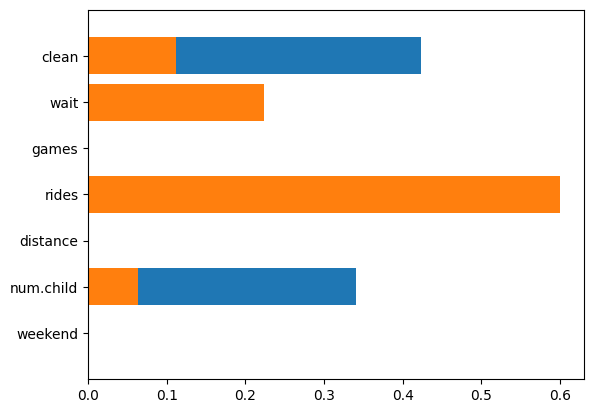

In [9]:
import numpy as np

import matplotlib.pyplot as plt 



def plot_tree(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), train_cols)

    plt.ylim(-1, n_features)

#특성 중요도

plot_tree(model1)

plot_tree(model2)

In [10]:
# 트리 모형의 max_leaf_nodes
import pandas as pd

df = pd.read_csv("c:/data/pima/data.csv")

In [11]:
X=df[df.columns[0:-1]]

y=df['outcome']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)

model1.fit(X_train, y_train)

print(model1.score(X_train,y_train))

print(model1.score(X_test,y_test))



1.0
0.7662337662337663


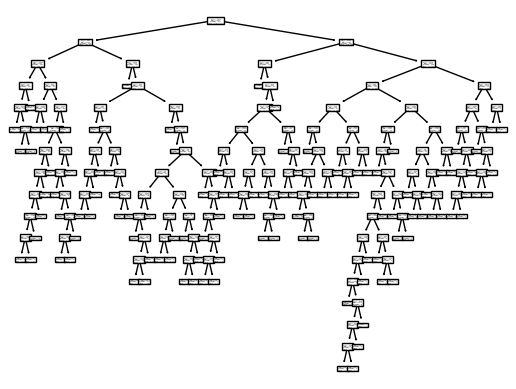

In [14]:
import matplotlib.pyplot as plt

from sklearn import tree

tree.plot_tree(model1)

plt.show()

0.7638436482084691
0.7597402597402597


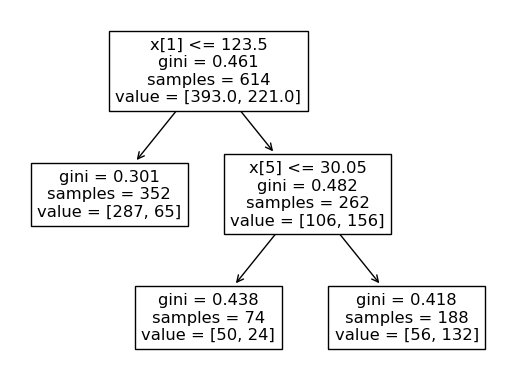

In [15]:
#max_leaf_nodes : leaf node(자식 노드가 없는 노드)의 최대 개수
#min_samples_leaf : leaf node가 되기 위한 최소한의 샘플 개수
#min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수

model2 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0) #갯수제한(잎사귀 노드 3개)

model2.fit(X_train, y_train)

print(model2.score(X_train,y_train))

print(model2.score(X_test,y_test))

tree.plot_tree(model2)

plt.show()

0.7736156351791531
0.7792207792207793


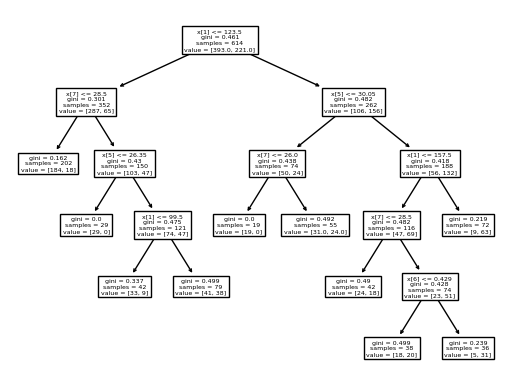

In [16]:
model3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0) #10개로 제한

model3.fit(X_train, y_train)

print(model3.score(X_train,y_train))

print(model3.score(X_test,y_test))

tree.plot_tree(model3)

plt.show()

In [17]:
from sklearn.tree import export_text

#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력

tree_rules = export_text(model2, feature_names=list(X_train.columns))

print(tree_rules)

|--- glucose <= 123.50
|   |--- class: 0
|--- glucose >  123.50
|   |--- bmi <= 30.05
|   |   |--- class: 0
|   |--- bmi >  30.05
|   |   |--- class: 1



In [19]:
from sklearn.tree import export_text

#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력

tree_rules = export_text(model3, feature_names=list(X_train.columns))

print(tree_rules)

|--- glucose <= 123.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- bmi <= 26.35
|   |   |   |--- class: 0
|   |   |--- bmi >  26.35
|   |   |   |--- glucose <= 99.50
|   |   |   |   |--- class: 0
|   |   |   |--- glucose >  99.50
|   |   |   |   |--- class: 0
|--- glucose >  123.50
|   |--- bmi <= 30.05
|   |   |--- age <= 26.00
|   |   |   |--- class: 0
|   |   |--- age >  26.00
|   |   |   |--- class: 0
|   |--- bmi >  30.05
|   |   |--- glucose <= 157.50
|   |   |   |--- age <= 28.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  28.50
|   |   |   |   |--- Diabetes_Pedigree_Function <= 0.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Diabetes_Pedigree_Function >  0.43
|   |   |   |   |   |--- class: 1
|   |   |--- glucose >  157.50
|   |   |   |--- class: 1



In [18]:
# tree_ : 트리의 루트 노드

n_nodes = model2.tree_.node_count

print('전체 노드 개수:',n_nodes)

threshold = model2.tree_.threshold

print('노드의 임계값:',threshold)

전체 노드 개수: 5
노드의 임계값: [123.5         -2.          30.05000019  -2.          -2.        ]


In [20]:
# 회귀트리
import pandas as pd

df = pd.read_csv('c:/data/ram/ram_price.csv')

df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price ($/Mbyte)')

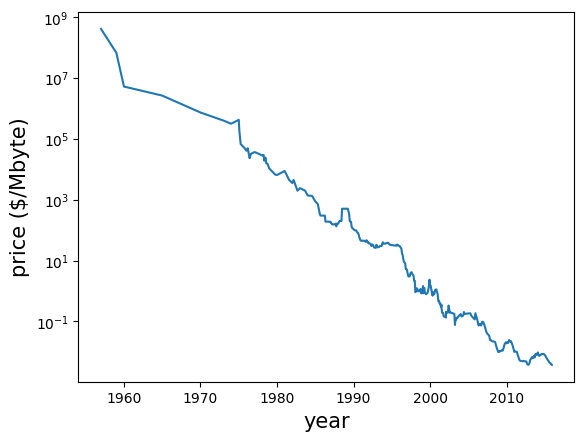

In [27]:
import matplotlib.pyplot as plt

#y축 로그 스케일

plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

# x축 날짜, y축 램 가격

#시간이 지날수록 램 가격은 점차 하락하고 있음

In [32]:
import numpy as np

#학습용과 검증용 구분(2000년 이전과 이후로 구분)

X_train0 = df[df['date'] < 2000]  #학습용  
X_test = df[df['date'] >= 2000]   #검증용
X_train=X_train0['date'].values #(.index)

# y값을 로그 스케일로 변환

y_train = np.log(X_train0['price'])
y_test = np.log(X_test['price'])

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

tree = DecisionTreeRegressor().fit(X_train.reshape(-1,1), y_train)
lr = LinearRegression().fit(X_train.reshape(-1,1), y_train) #선형회귀모형

#svr = SVR(kernel='linear').fit(X_train.reshape(-1,1), y_train)  
svr = SVR(kernel='rbf').fit(X_train.reshape(-1,1), y_train)

#전체 기간의 자료

x_all = np.array(df['date']).reshape(-1, 1)
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log값 되돌리기
pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기
pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr) # log값 되돌리기

In [34]:
from sklearn.metrics import mean_squared_error

y_pred = tree.predict(X_test['price'].values.reshape(-1,1))

rms = np.sqrt(mean_squared_error(y_test, y_pred))

print(rms)

y_pred = lr.predict(X_test['price'].values.reshape(-1,1))

rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = svr.predict(X_test['price'].values.reshape(-1,1))

rms = np.sqrt(mean_squared_error(y_test, y_pred))

print(rms)

23.038370257895192
861.08402279523
10.42933757466685


Text(0, 0.5, 'price ($/Mbyte)')

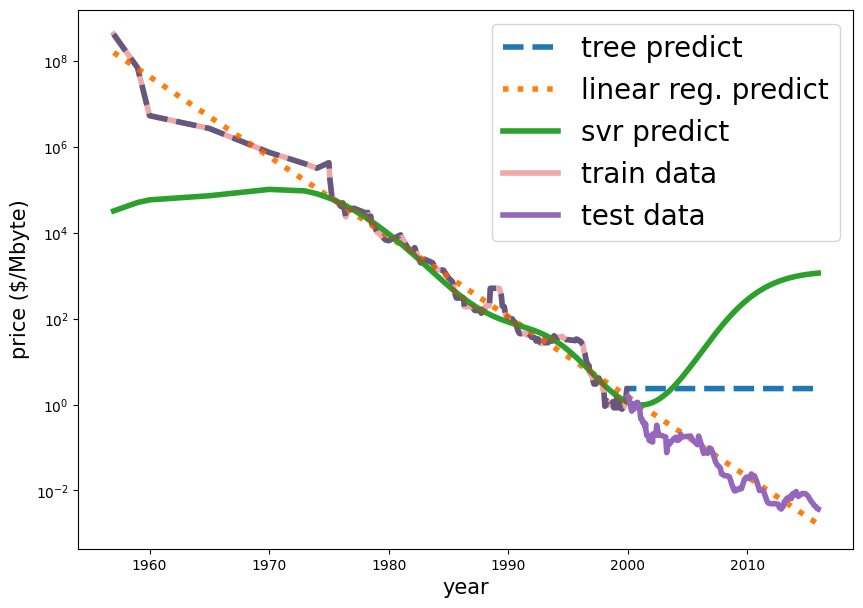

In [31]:
#실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교

plt.figure(figsize=(10,7))

plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')

plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls=':')

plt.semilogy(df['date'], price_svr,label='svr predict',lw='4',ls='-')

plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)

plt.semilogy(X_test['date'], X_test['price'], lw='4', label='test data')

plt.legend(loc=1, fontsize=20)

plt.xlabel('year', size=15)

plt.ylabel('price ($/Mbyte)', size=15)

# 선형회귀모형: 직선모양

# 결정트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력이 없음(트리 모형의 단점)

# 새로운 데이터를 예측하려면 시계열분석, 순환신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함

In [ ]:
#모형결합(다수결)

# 모형 결합(model combining)
# 앙상블 방법론(ensemble methods)
# 예측 성능을 향싱시키기 위하여 하나의 모형이 아닌 복수의 모형을 결합하는 방법
# 단일 모형을 사용하는 것보다 계산량이 증가하지만 성능이 향상될 수 있음(과적합 방지 등)
# 취합(aggregation)과 부스팅(boosting)
# 취합: 사용할 모형의 집합을 처음부터 고정
# 다수결(Majority Voting), 배깅(Baggind), 랜덤포레스트(Random Forest)
# 부스팅: 사용할 모형을 점진적으로 늘려가는 방법
# 에이다부스트(AdaBoost), 그레디언트 부스트(Gradient Boost)  
# 다수결 방법
# Hard Voting: 단순 투표, 가장 많이 나온 결과를 채택(디폴트)
# Soft Voting: 가중치 투표, 개별 모형의 조건부 확률들을 합한 것들 중 가장 큰 것을 채택


In [35]:
import pandas as pd

# 신용카드 거래 데이터 csv 파일을 로딩(원본)

df = pd.read_csv("c:/data/creditcard/creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
train_cols = df.columns[1:-1]

print(train_cols)
X = df[train_cols] # 독립변수
y = df["Class"]

y.value_counts()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


Class
0    284315
1       492
Name: count, dtype: int64

In [37]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Class'])

df2=pd.concat([X_samp,y_samp],axis=1)
df2.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [39]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Class"]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

model1 = LogisticRegression(random_state=1, max_iter=1000) #최대반복횟수
model2 = DecisionTreeClassifier(random_state=1) #의사결정나무
model3 = KNeighborsClassifier(n_neighbors=2) #사례기반추론

X_train=np.array(X_train)
X_test=np.array(X_test)

#     estimators: 개별 모형 목록, 리스트나 named parameter 형식으로 입력
#     voting: {hard, soft} hard voting 과 soft voting 선택. 디폴트는 hard
# 로지스틱 회귀분석과 의사결정나무, KNN 3개를 다수결로 합친 모형
# estimators=[(alias, model)]

ensemble = VotingClassifier(estimators=[('lr', model1), ('tree', model2), ('knn', model3)], voting='soft')
#앙상블 다수결 투표
for model in (model1, model2, model3, ensemble):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()

#일반적으로 다수결 모형이 개별 모형보다 성능이 더 좋음 

LogisticRegression(max_iter=1000, random_state=1)
학습용: 0.9529860228716646
검증용: 0.9289340101522843

DecisionTreeClassifier(random_state=1)
학습용: 1.0
검증용: 0.9289340101522843

KNeighborsClassifier(n_neighbors=2)
학습용: 0.9428208386277002
검증용: 0.9289340101522843

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=1)),
                             ('tree', DecisionTreeClassifier(random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=2))],
                 voting='soft')
학습용: 1.0
검증용: 0.9441624365482234



In [42]:
# 언더샘플링을 하지 않은 경우와 비교

from sklearn.metrics import classification_report  

pred=model1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       102
           1       0.93      0.93      0.93        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [1]:
# 모형결합(랜덤포레스트)

# 랜덤포레스트: 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법
# 배깅은 사용하는 모형의 종류에 제한이 없으나 랜덤포레스트는 의사결정나무 모형만을 사용한다.
# 독립변수의 차원을 랜덤하게 감소시킨 후 독립변수를 선택하는 방법
# csv 파일을 로딩

import pandas as pd

df = pd.read_csv("c:/data/heart/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [3]:
train_cols = df.columns[0:13]

X = df[train_cols] #독립변수
y = df["target"]

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['target'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["target"].value_counts()

target
0    138
1    138
Name: count, dtype: int64

In [5]:
X = df_samp[train_cols] #독립변수
y = df_samp["target"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier(random_state=0)
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
                                #분류기 수
for model in (model1, model2):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6071428571428571

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.75



In [ ]:
#랜덤포레스트의 변종으로 익스트림 랜덤 트리(Extemely Randomized Trees)
#  또는 엑스트라 트리(Extra Trees) 모형
# 랜덤포레스트 : 부트스트랩(중복된 샘플) 사용, 모든 변수 사용
# 엑스트라 트리 : 모든 샘플을 사용, 변수를 랜덤으로 선택

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)

for model in (model1, model2, model3):

    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()

# DecisionTree < RandomForest < ExtraTree 순으로 성능이 개선됨 

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6071428571428571

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.75

ExtraTreesClassifier(random_state=0)
학습용: 1.0
검증용: 0.8035714285714286



In [9]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_tree(model):

    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("variables")    
    plt.ylim(-1, n_features)

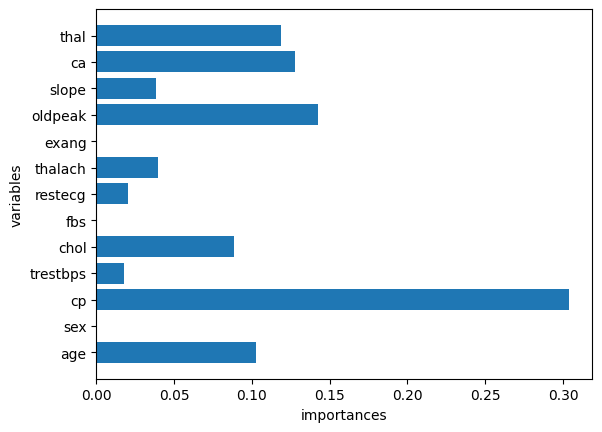

In [10]:
plot_tree(model1)

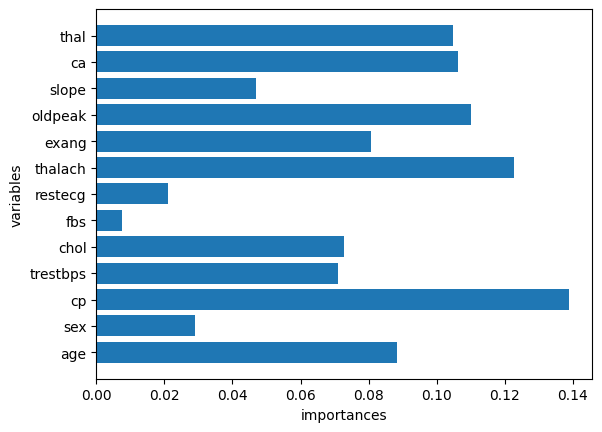

In [11]:
plot_tree(model2)

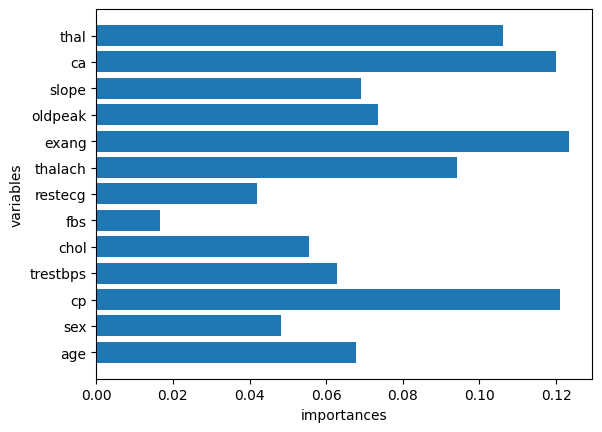

In [12]:
plot_tree(model3)

In [13]:
# 트리모형의 교차검증2
import pandas as pd

df = pd.read_csv("c:/data/iris/iris.csv")

df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [14]:
X=df[df.columns[:-2]]

y=df['Species']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
from sklearn.tree import DecisionTreeClassifier

#트리 모델 생성

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9666666666666667


In [17]:
#하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': list(range(1, 11)),
    # 변수       값
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': list(range(2, 11)),
    # 학습완료 노드수
    'min_samples_split': [2, 3, 4]
}

gcv = GridSearchCV(model, params, cv=3) #교차검증 (횟수)
gcv.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]})

In [18]:
gcv.cv_results_["params"][:5]

[{'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 3},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 2,
  'min_samples_split': 4},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 2},
 {'criterion': 'gini',
  'max_depth': 1,
  'max_leaf_nodes': 3,
  'min_samples_split': 3}]

In [19]:
scores=gcv.cv_results_["mean_test_score"]
scores[:10]

array([0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66])

0.9733333333333333


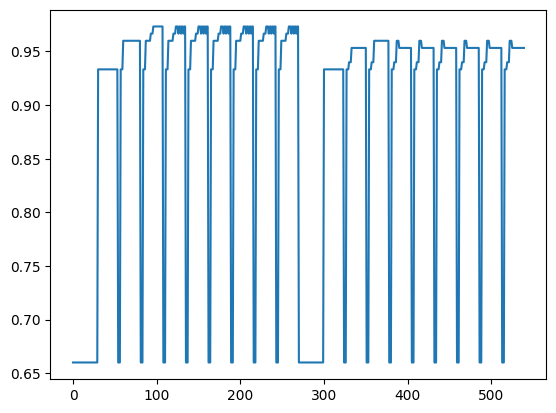

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

print(max(scores))
plt.plot(scores)

In [21]:
#최고 정확도
print(gcv.best_score_)

#최적의 파라미터
print(gcv.best_params_)

#최적의 모형
print(gcv.best_estimator_)

0.9733333333333333
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, random_state=0)


In [22]:
#최적의 파라미터를 적용한 모형
from sklearn.model_selection import cross_val_score
import numpy as np

tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=0)
result=cross_val_score(tree, X, y, cv=10)

#교차검증 결과

print(result)
print(np.mean(result))
print(np.max(result))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
0.96
1.0
